## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('data.csv')

## Displaying the dataset's first 5 records

In [3]:
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,10,1,6,7,9,Responsible
1,Male,19,4,8,7,4,6,Extraveted
2,Female,18,3,5,7,7,7,Serious
3,Female,22,7,1,7,8,10,Responsible
4,Female,19,10,1,7,4,8,Dependable


## Displaying the dataset's last 5 records

In [4]:
df.tail()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
1019,Female,19,9,3,9,5,9,Responsible
1020,Male,18,4,5,8,9,6,Serious
1021,Male,18,4,9,3,7,5,Extraveted
1022,Male,23,10,2,10,6,7,Responsible
1023,Female,18,8,3,6,7,9,Responsible


## Data Preprocessing (make sure the gender don't have 0 value)

In [5]:
df[df['Gender']==0]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality


## EDA

In [6]:
df.dtypes

Gender               object
Age                   int64
openness              int64
neuroticism           int64
conscientiousness     int64
agreeableness         int64
extraversion          int64
Personality          object
dtype: object

## Infomations about the Dataset (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1024 non-null   object
 1   Age                1024 non-null   int64 
 2   openness           1024 non-null   int64 
 3   neuroticism        1024 non-null   int64 
 4   conscientiousness  1024 non-null   int64 
 5   agreeableness      1024 non-null   int64 
 6   extraversion       1024 non-null   int64 
 7   Personality        1024 non-null   object
dtypes: int64(6), object(2)
memory usage: 64.1+ KB


## Stats of the Dataset (EDA)

In [8]:
df.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,19.857422,5.615234,4.826172,7.000000,6.297852,7.309570
std,2.555577,2.759929,2.630942,1.940463,1.805324,1.493834
min,5.000000,1.000000,1.000000,3.000000,3.000000,5.000000
25%,18.000000,3.000000,3.000000,6.000000,5.000000,6.000000
50%,19.000000,6.000000,4.000000,7.000000,6.000000,7.000000
75%,21.000000,8.000000,7.000000,8.000000,8.000000,8.000000
max,28.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Visulizing the Traget varible

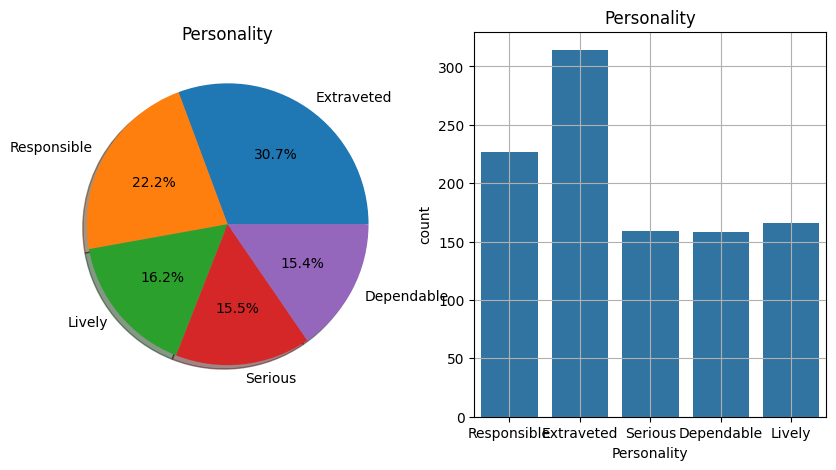

In [9]:
# Creating two subplots with dimensions 10 by 5 inches
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Creating a pie chart for the 'Personality' column
df['Personality'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Adding percentage display on the pie chart
    ax=ax[0],  # Specifying the first subplot
    shadow=True  # Adding shadow for better visualization
)

# Setting the title of the first subplot
ax[0].set_title('Personality')

# Removing the y-label (it's not needed for a pie chart)
ax[0].set_ylabel('')

# Creating a count plot for the 'Personality' column
sns.countplot(x='Personality', data=df, ax=ax[1])

# Setting the title of the second subplot
ax[1].set_title('Personality')

# Adding a grid to the plot (not needed for this specific case but can be useful in other contexts)
plt.grid()

# Displaying the plots
plt.show()

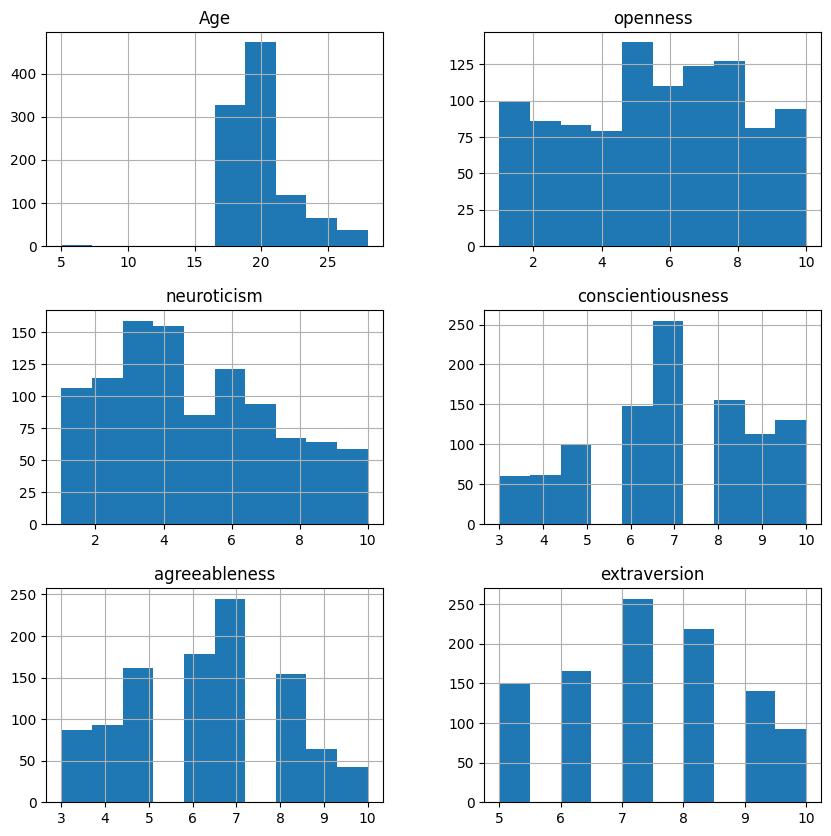

In [10]:
# Creating histograms for all columns in the DataFrame 'df'
df.hist(bins=10, figsize=(10, 10))

# Displaying the histograms
plt.show()

## Using Lable encoding to change Gender and Personality to Numerical value

In [11]:
label_encoders = {}
# Encode 'Personality (Class label)'
le_personality = LabelEncoder()
df['Personality'] = le_personality.fit_transform(df['Personality'])
label_encoders['Personality'] = le_personality

# Encode 'Gender'
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
label_encoders['Gender'] = le_gender

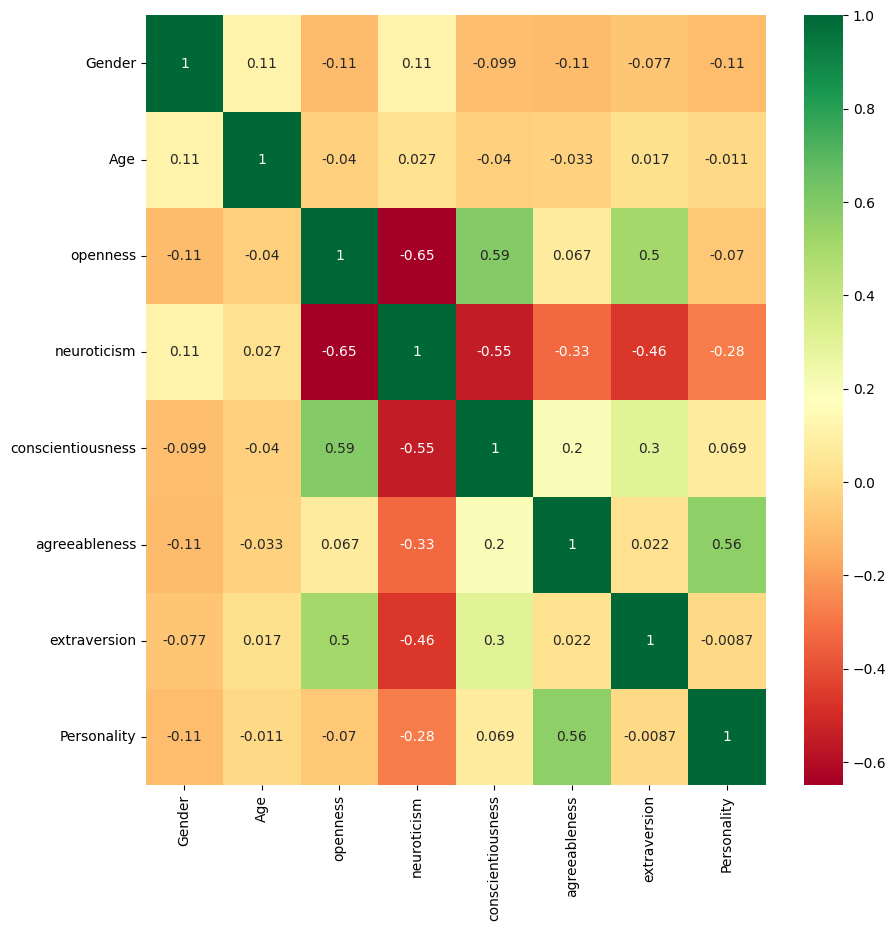

In [12]:
# Calculating the correlation matrix for the DataFrame 'df'
corrmat = df.corr()

# Getting the index of the correlation matrix
top_corr_features = corrmat.index

# Creating a figure with dimensions 10 by 10 inches
plt.figure(figsize=(10, 10))

# Creating a heatmap for the correlation matrix of the top correlated features
g = sns.heatmap(df[top_corr_features].corr(),  # Correlation matrix of the top features
                annot=True,  # Annotating the cells with the correlation values
                cmap='RdYlGn')  # Using the 'RdYlGn' colormap

## Ensuring the values are changed

In [13]:
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,1,17,10,1,6,7,9,3
1,1,19,4,8,7,4,6,1
2,0,18,3,5,7,7,7,4
3,0,22,7,1,7,8,10,3
4,0,19,10,1,7,4,8,0


## Serparating features and target variables

In [14]:
x=df.drop('Personality', axis="columns")
y=df['Personality']
print("shape of Independent variable x:", x.shape)
print("shape of Independent variable y:",y.shape)

shape of Independent variable x: (1024, 7)
shape of Independent variable y: (1024,)


## Train and Test Split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## Printing the shape of x_train(819 rows and 8 columns)

In [16]:
x_train.shape

(819, 7)

 ## Printing the shape of y_train(819 rows and 1 column)

In [17]:
y_train.shape

(819,)

## Printing the shape of x_test(205 rows and 8 columns)

In [18]:
x_test.shape

(205, 7)

## Printing the shape of x_train(205 rows and 1 column)

In [19]:
y_test.shape

(205,)

## Use Standard Scaler to Standrize the data

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

## Transforming Train data into Array format

In [21]:
scaler.transform(x_train)

array([[ 1.05395671,  0.83166037,  1.25618424, ...,  1.55896135,
         0.94078198, -0.19032078],
       [ 1.05395671, -1.11109446,  0.17055474, ...,  1.04783671,
         0.38884757, -0.85360893],
       [-0.94880557, -0.72254349,  1.25618424, ...,  1.04783671,
         0.94078198,  1.79954368],
       ...,
       [ 1.05395671,  0.05455844,  1.61806075, ...,  0.02558744,
        -0.71502126, -0.19032078],
       [ 1.05395671, -1.11109446,  0.53243124, ...,  0.02558744,
         0.38884757,  0.47296738],
       [ 1.05395671,  2.7744152 ,  0.17055474, ..., -0.99666184,
         2.0446508 , -1.51689708]])

## Transforming Test data into Array format

In [22]:
scaler.transform(x_test)

array([[ 1.05395671,  0.83166037, -0.55319827, ..., -0.4855372 ,
         2.0446508 , -0.19032078],
       [-0.94880557,  0.4431094 ,  0.17055474, ...,  1.04783671,
        -0.16308685, -0.19032078],
       [-0.94880557,  2.38586424,  0.53243124, ...,  0.02558744,
        -0.16308685, -0.19032078],
       ...,
       [ 1.05395671, -0.33399253, -1.63882777, ...,  0.02558744,
        -1.81889009, -1.51689708],
       [ 1.05395671, -0.72254349,  0.89430774, ...,  1.04783671,
        -0.16308685, -0.19032078],
       [ 1.05395671, -0.33399253, -1.63882777, ..., -1.50778647,
        -0.71502126, -0.19032078]])

## Initialize and train the RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators = 10, criterion='entropy',random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Make predictions with the trained RandomForest model
x_pred = rf.predict(x_test)

# Calculate and print accuracy
print("Accuracy: ({0:.2f})".format(accuracy_score(y_test, x_pred)))

Accuracy: (0.80)


# Initialize and train the LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

# Make predictions with the trained RandomForest model
x_pred = lr.predict(x_test)

# Calculate and print accuracy
print("Accuracy: ({0:.2f})".format(accuracy_score(y_test, x_pred)))

Accuracy: (0.78)


In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)  # Use 'rbf' for non-linear classification
svc.fit(x_train, y_train)

# Make predictions with the trained RandomForest model
x_pred = svc.predict(x_test)

# Calculate and print accuracy
print("Accuracy: ({0:.2f})".format(accuracy_score(y_test, x_pred)))

Accuracy: (0.78)


## Initialize and train the KNeiphborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Make predictions with the trained RandomForest model
x_pred = knn.predict(x_test)

# Calculate and print accuracy
print("Accuracy: ({0:.2f})".format(accuracy_score(y_test, x_pred)))

Accuracy: (0.72)


## Initialize and train the GradientBoostingClassifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

gbc.fit(x_train, y_train)

# Make predictions with the trained RandomForest model
x_pred = gbc.predict(x_test)

# Calculate and print accuracy
print("Accuracy: ({0:.2f})".format(accuracy_score(y_test, x_pred)))

Accuracy: (0.80)


## Initialize and train the GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Make predictions with the trained RandomForest model
x_pred = gnb.predict(x_test)

# Calculate and print accuracy
print("Accuracy: ({0:.2f})".format(accuracy_score(y_test, x_pred)))

Accuracy: (0.79)
